# Music Recommendation System

## Importing Essential Libraries

In [3]:
# numpy and pandas are used for numerical computations and data manipulation
import numpy as np
import pandas as pd

# matplotlib and seaborn are the libraries for plotting and visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm  # tqdm is used for creating progress bars

import warnings  # warnings is used to suppress warnings for a cleaner output.

warnings.filterwarnings('ignore')
sns.set()

from sklearn.metrics.pairwise import cosine_similarity

# scikit-learn (KMeans, MinMaxScaler) are Machine learning algorithms and tools for clustering and scaling data
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from datetime import datetime, timedelta  # datetime is used to manage song listening time and history.


## Dataset Loading

In [5]:
song_data = pd.read_csv("D:\\Datasets\\Music Recommendation System\\spotify.csv") # The dataset is loaded from local storage

## Exploratory Data Analysis 

In [7]:
song_data.head(10) # First 10 rows for displaying

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


In [8]:
song_data.tail(10) # Last 10 rows for displaying

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174379,0.79500,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174380,0.04840,"['Stephan F', 'YA-YA']",0.693,177148,0.826,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.231,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.361,2020
174381,0.79500,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174382,0.14100,"['BigBankCarti', 'Keyvo400']",0.544,215014,0.407,1,3ASGdyWXeXsXtOIWtm0tv4,0.000000,4,0.253,-12.745,0,LayUp,0,2020-12-31,0.2330,129.750,0.490,2020
174383,0.79500,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.891000,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [9]:
song_data.shape # For seeing the numbers of rows and columns

(174389, 19)

In [10]:
song_data.isnull().sum() # Seeing the null values

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [11]:
song_data.info()  # A concise summary of the dataset, including column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [12]:
song_data.describe() # Statistical summary of numerical columns

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


## Data Preprocessing

In [14]:
# Removing the unnecessary columns that are not used for feature correlation
song_df = song_data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])

In [15]:
song_df.head(10) # Seeing the updated dataset

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.991000,0.598,168333,0.2240,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340
1,0.643000,0.852,150200,0.5170,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500
2,0.993000,0.647,163827,0.1860,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890
3,0.000173,0.730,422087,0.7980,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422
4,0.295000,0.704,165224,0.7070,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990
5,0.996000,0.424,198627,0.2450,0,0.799000,5,0.2350,-11.470,1,9,0.0397,103.870,0.4770
6,0.992000,0.782,195200,0.0573,0,0.000002,5,0.1760,-12.453,1,5,0.0592,85.652,0.4870
7,0.996000,0.474,186173,0.2390,0,0.186000,9,0.1950,-9.712,1,0,0.0289,78.784,0.3660
8,0.996000,0.469,146840,0.2380,0,0.960000,8,0.1490,-18.717,1,0,0.0741,130.060,0.6210
9,0.006820,0.571,476304,0.7530,0,0.873000,8,0.0920,-6.943,1,0,0.0446,126.993,0.1190


## Correlation Analysis and Visualization

In [17]:
song_df.corr() # Correlation

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.263217,-0.089169,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968
danceability,-0.263217,1.000000,-0.100757,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713
duration_ms,-0.089169,-0.100757,1.000000,0.060516,-0.033808,0.103621,0.002020,0.028942,0.019791,-0.046849,0.024717,-0.097838,-0.008182,-0.183199
energy,-0.750852,0.204838,0.060516,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418
explicit,-0.208176,0.200842,-0.033808,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275
instrumentalness,0.221956,-0.215589,0.103621,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188
key,-0.028028,0.026266,0.002020,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592
liveness,-0.029654,-0.110033,0.028942,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781
loudness,-0.546639,0.249541,0.019791,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520
mode,0.064633,-0.048358,-0.046849,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592


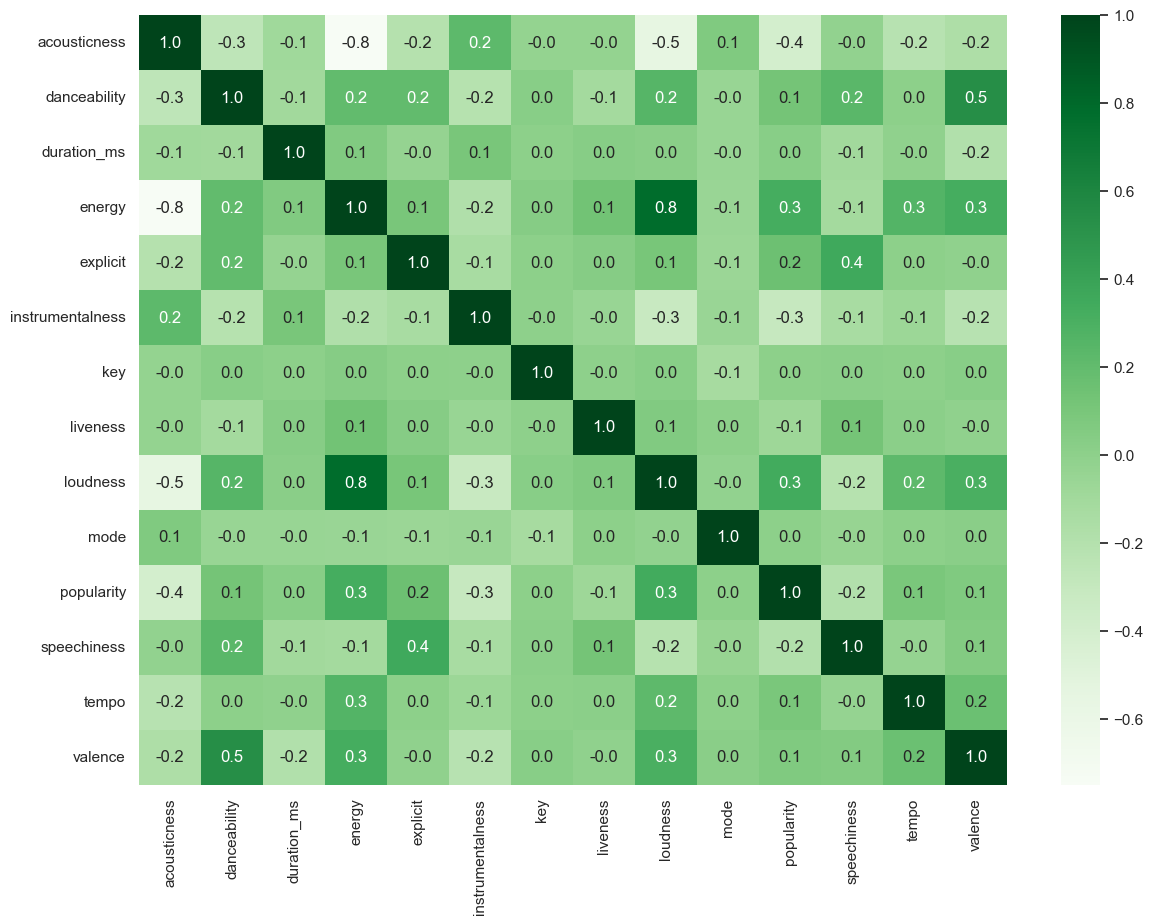

In [18]:
# The heatmap of the correlation matrix is generated to visualize the relationships between different numerical features
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(song_df.corr(),annot = True,fmt = ".1f",ax = ax, cmap="Greens")
plt.show()

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

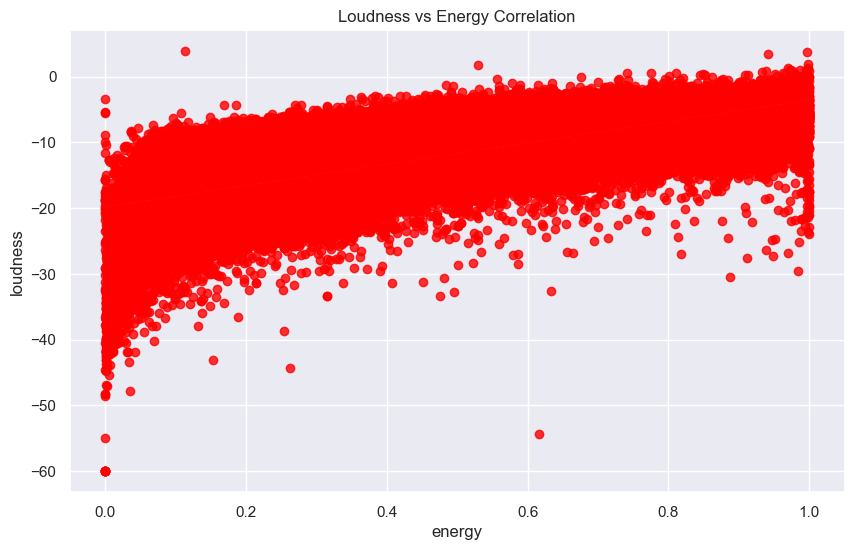

In [19]:
# A scatter plot with a regression line showing the relationship between loudness and energy
plt.figure(figsize=(10,6))
sns.regplot(data=song_data, y='loudness', x='energy', color='red').set(title='Loudness vs Energy Correlation')

Text(0.5, 1.0, 'Liveness vs Popularity')

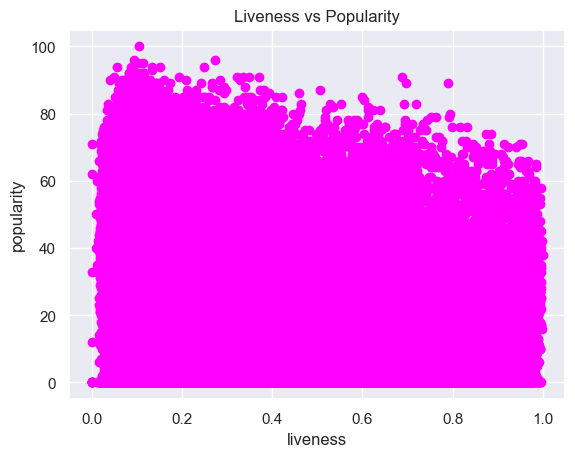

In [20]:
# A scatter plot visualizing the relationship between liveness and popularity
plt.scatter(song_data["liveness"],song_data["popularity"], color="magenta")
plt.xlabel("liveness")
plt.ylabel("popularity")
plt.title("Liveness vs Popularity")

Text(0.5, 1.0, 'Energy vs Loudness')

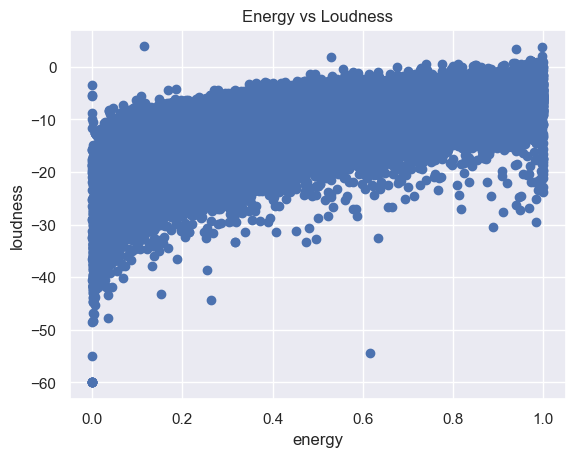

In [21]:
# A scatter plot between energy and loudness
plt.scatter(song_data["energy"],song_data["loudness"])
plt.xlabel("energy")
plt.ylabel("loudness")
plt.title("Energy vs Loudness")

Text(0.5, 1.0, 'Duration_ms vs Popularity')

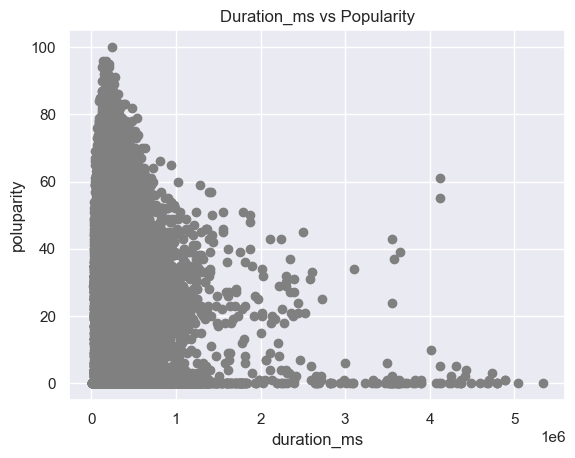

In [22]:
# A plot showing how the duration of a song relates to its popularity
plt.scatter(song_data["duration_ms"],song_data["popularity"], color="gray")
plt.xlabel("duration_ms")
plt.ylabel("poluparity")
plt.title("Duration_ms vs Popularity")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

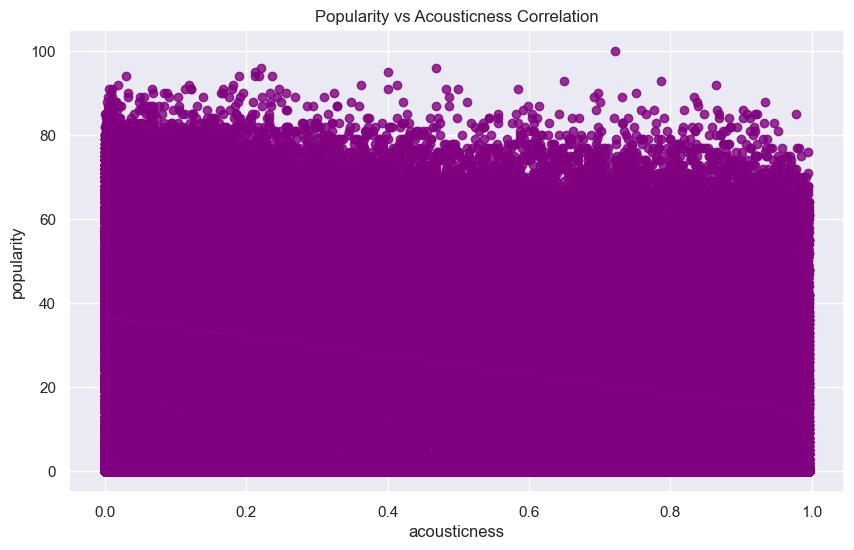

In [23]:
# A regression plot showing how acousticness correlates with popularity
plt.figure(figsize=(10,6))
sns.regplot(data=song_data, y='popularity', x='acousticness', color='purple').set(title='Popularity vs Acousticness Correlation')

In [24]:
# For filling the missing values with the mean of their respective columns
song_df.fillna(song_df.mean(), inplace=True)

## Data Normalization and Clustering

In [26]:
# Normalization which scales the values to a range of [0, 1] based on selected columns
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = song_data.select_dtypes(include=datatypes)
scaler = MinMaxScaler()
normarization = scaler.fit_transform(normarization)

In [27]:
# KMeans clustering algorithm is applied with 10 clusters, and each song is assigned to a cluster
kmeans = KMeans(n_clusters=10, random_state=42)
features = kmeans.fit_predict(normarization)
song_data['features'] = features

## Music Recommendation System Class

In [29]:
# Tracking how many times a song has been listened to
class Spotify_Music_Recommendation():
    def __init__(self, spotify):
        self.spotify = spotify
        self.listen_history = {}
        
    # Tracking how many times a song has been listened to, storing the last listened time and the song name and its count are stored in listen_history
    def listen_to_song(self, song_name):
        current_time = datetime.now()
        if song_name in self.listen_history:
            self.listen_history[song_name]['count'] += 1
            self.listen_history[song_name]['last_listened'] = current_time
        else:
            self.listen_history[song_name] = {'count': 1, 'last_listened': current_time}
    
    # Tracking if the song has been played within the time_frame (e.g., last 720 hours means 1 month) and showing how many times it has been played
    def music_recommend(self, song_name, amount=10, time_frame=720):
        distance = []
        song = self.spotify[(self.spotify.name.str.lower() == song_name.lower())].head(1).values[0]
        rec = self.spotify[self.spotify.name.str.lower() != song_name.lower()]

        cutoff_time = datetime.now() - timedelta(hours=time_frame)
        
        if song_name in self.listen_history and self.listen_history[song_name]['last_listened'] > cutoff_time:
            print(f"You have listened to '{song_name}' {self.listen_history[song_name]['count']} times in the last {time_frame} hours.")

        # Calculateing the distance score based on the features of the songs and sorting the recommendations by proximity to the listened song        
        for other_song in tqdm(rec.values):
            d = 0
            for col in range(len(rec.columns)):
                if col not in [1, 6, 12, 14, 18]:  
                    d += np.absolute(float(song[col]) - float(other_song[col]))
            distance.append(d)

        # Adjusting the distance score to give higher priority to songs if the user has frequently listened to the current song
        rec['distance'] = distance
        rec = rec.sort_values('distance')

        if song_name in self.listen_history:
            listen_count = self.listen_history[song_name]['count']
            rec['distance'] = rec['distance'] - listen_count  

        columns = ['artists', 'name']
        return rec[columns][:amount]

## Instance Creation and Music Recommendation 

In [31]:
recommendations = Spotify_Music_Recommendation(song_data)

## 10 Recommended Songs based on The Song

In [33]:
recommendations.listen_to_song("Taro Yard Slaughter House") # First time listen 
recommendations.listen_to_song("Ntourou Ntourou")  # Second time listen

# Recommends 10 songs that are listened within 1 month
recommended_songs = recommendations.music_recommend("Ira Angeli", 10, time_frame=720) 
print(recommended_songs)

100%|███████████████████████████████████████████████████████████████████████| 174388/174388 [00:03<00:00, 48596.86it/s]


                                                  artists  \
108753                                   ['Edgar Froese']   
157534                                     ['Micro Scan']   
109309                                     ['Micro Scan']   
141784                  ['Various Artists', 'Micro Scan']   
109049                                     ['Micro Scan']   
130102                                    ['Miles Davis']   
61811   ['Sergei Prokofiev', 'Jascha Heifetz', 'Concer...   
146472      ['Thelonious Monk Quartet', 'Johnny Griffin']   
123443          ['Arc In The Sky', '7AM At Heavens Gate']   
109131                                       ['TrancEye']   

                                                     name  
108753            A Dali-Esque Sleep Fuse - 2012 Remaster  
157534                                   300000 Years Ago  
109309                                   300000 Years Ago  
141784            300000 Years Ago (145 F Fullon Goa Mix)  
109049                      

In [34]:
recommended_songs = recommendations.music_recommend("Keep A Song In Your Soul", 10, time_frame=720) 
print(recommended_songs)

100%|███████████████████████████████████████████████████████████████████████| 174387/174387 [00:03<00:00, 48721.97it/s]


                           artists                                 name
146838   ['Alvin & The Chipmunks']          I Wish I Could Speak French
60455               ['Titi Botez']                   O mia bella Napoli
85493                     ['DEVO']                        Praying Hands
46468     ['Tennessee Ernie Ford']       Just Before The Battle, Mother
6426             ['Nat King Cole']  It Could Happen To You - Remastered
127187     ['Makbule Enver Hanım']             Şu Kızı Bana Vermiyorlar
27942                     ['Dion']                Donna the Prima Donna
104250                  ['Bronco']                          La Regañona
101197          ['The Beach Boys']                     Don't Worry Baby
27339   ['El Palomo Y El Gorrion']                 Dos Palomas Al Volar


In [35]:
recommended_songs = recommendations.music_recommend("Broken Puppet - Original Mix", 10, time_frame=720) 
print(recommended_songs)

100%|███████████████████████████████████████████████████████████████████████| 174388/174388 [00:03<00:00, 46306.33it/s]


                                                  artists  \
124802                ['Thomas Totton', 'Tomy Rodrigues']   
17605      ['Cannonball Adderley', 'Nat Adderley Sextet']   
64895                                     ['Grant Green']   
18993                                   ['Grateful Dead']   
124534                                           ['Bee4']   
124676                                   ['Pentacrostic']   
26277        ['Richard Rodgers', 'New York Philharmonic']   
55936                                       ['Metallica']   
160905  ['Franz Joseph Haydn', 'London Philharmonic Or...   
64371               ['Miles Davis', 'Modern Jazz Giants']   

                                                     name  
124802                 SPIRIT OF MUSIC - INSTRUMENTAL MIX  
17605                          Aquarius - Remastered 2008  
64895   Grant's Dimensions - Remastered 2002/Rudy Van ...  
18993   Althea - Live at Soldier Field, Chicago, IL 7/...  
124534                      